Image and Ground-Truth Mask Comparison

loading annotations into memory...
Done (t=0.54s)
creating index...
index created!


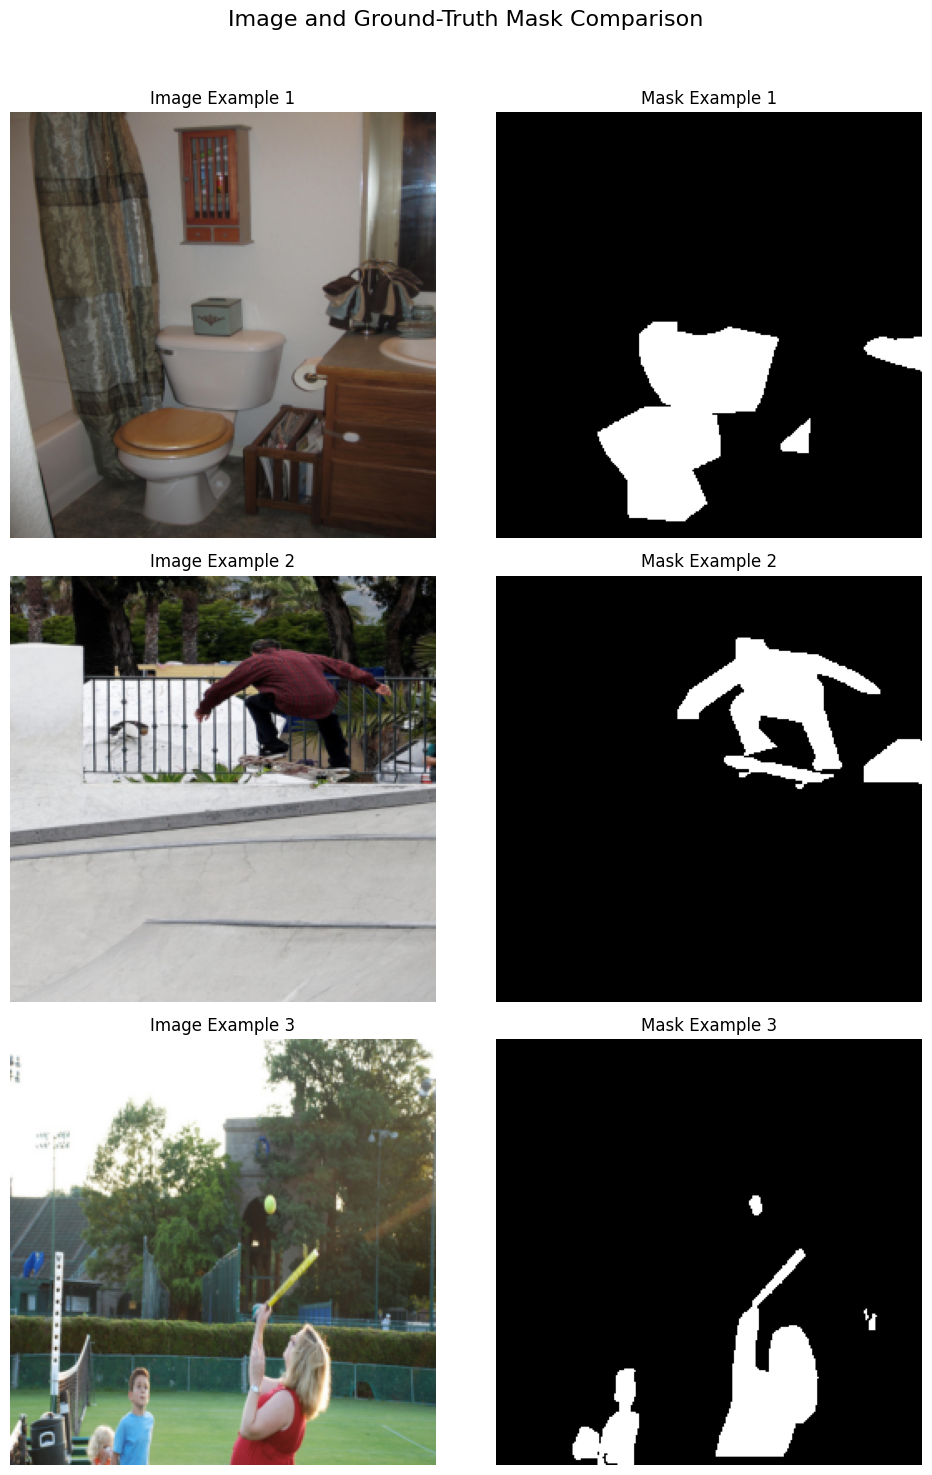

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pycocotools.coco import COCO
import torchvision.transforms as T
import random

# --- 1. Define Paths and Parameters ---
DATA_DIR = '../data'
IMAGE_DIR = os.path.join(DATA_DIR, 'val2017')
ANN_FILE = os.path.join(DATA_DIR, 'annotations', 'instances_val2017.json')
TARGET_SIZE = (256, 256)
NUM_EXAMPLES = 3 # Number of images to display

# --- 2. Initialize COCO API to read masks ---
coco = COCO(ANN_FILE)
img_ids = coco.getImgIds()

# --- 3. Create a subplot grid for multiple images ---
fig, axes = plt.subplots(NUM_EXAMPLES, 2, figsize=(10, 5 * NUM_EXAMPLES))
fig.suptitle('Image and Ground-Truth Mask Comparison', fontsize=16)

# --- 4. Loop to load, process, and plot each image ---
for i in range(NUM_EXAMPLES):
    # Select a random image
    random_img_id = random.choice(img_ids)
    img_info = coco.loadImgs(random_img_id)[0]
    img_path = os.path.join(IMAGE_DIR, img_info['file_name'])
    original_image = Image.open(img_path).convert('RGB')

    # Get its corresponding mask
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    annotations = coco.loadAnns(ann_ids)
    combined_mask_array = np.zeros((img_info['height'], img_info['width']))
    for ann in annotations:
        combined_mask_array = np.maximum(combined_mask_array, coco.annToMask(ann))
    original_mask = Image.fromarray(combined_mask_array)

    # Define resize transformations
    image_transform = T.Compose([
        T.Resize(TARGET_SIZE),
        T.ToTensor()
    ])
    mask_transform = T.Compose([
        T.Resize(TARGET_SIZE, interpolation=T.InterpolationMode.NEAREST),
        T.ToTensor()
    ])

    # Apply resizing
    resized_image_tensor = image_transform(original_image)
    resized_mask_tensor = mask_transform(original_mask)

    # Plot the i-th real image
    axes[i, 0].imshow(resized_image_tensor.permute(1, 2, 0))
    axes[i, 0].set_title(f"Image Example {i+1}")
    axes[i, 0].axis('off')

    # Plot the i-th mask image
    axes[i, 1].imshow(resized_mask_tensor.squeeze(), cmap='gray')
    axes[i, 1].set_title(f"Mask Example {i+1}")
    axes[i, 1].axis('off')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
plt.show()

Visualizing Different Augmentations

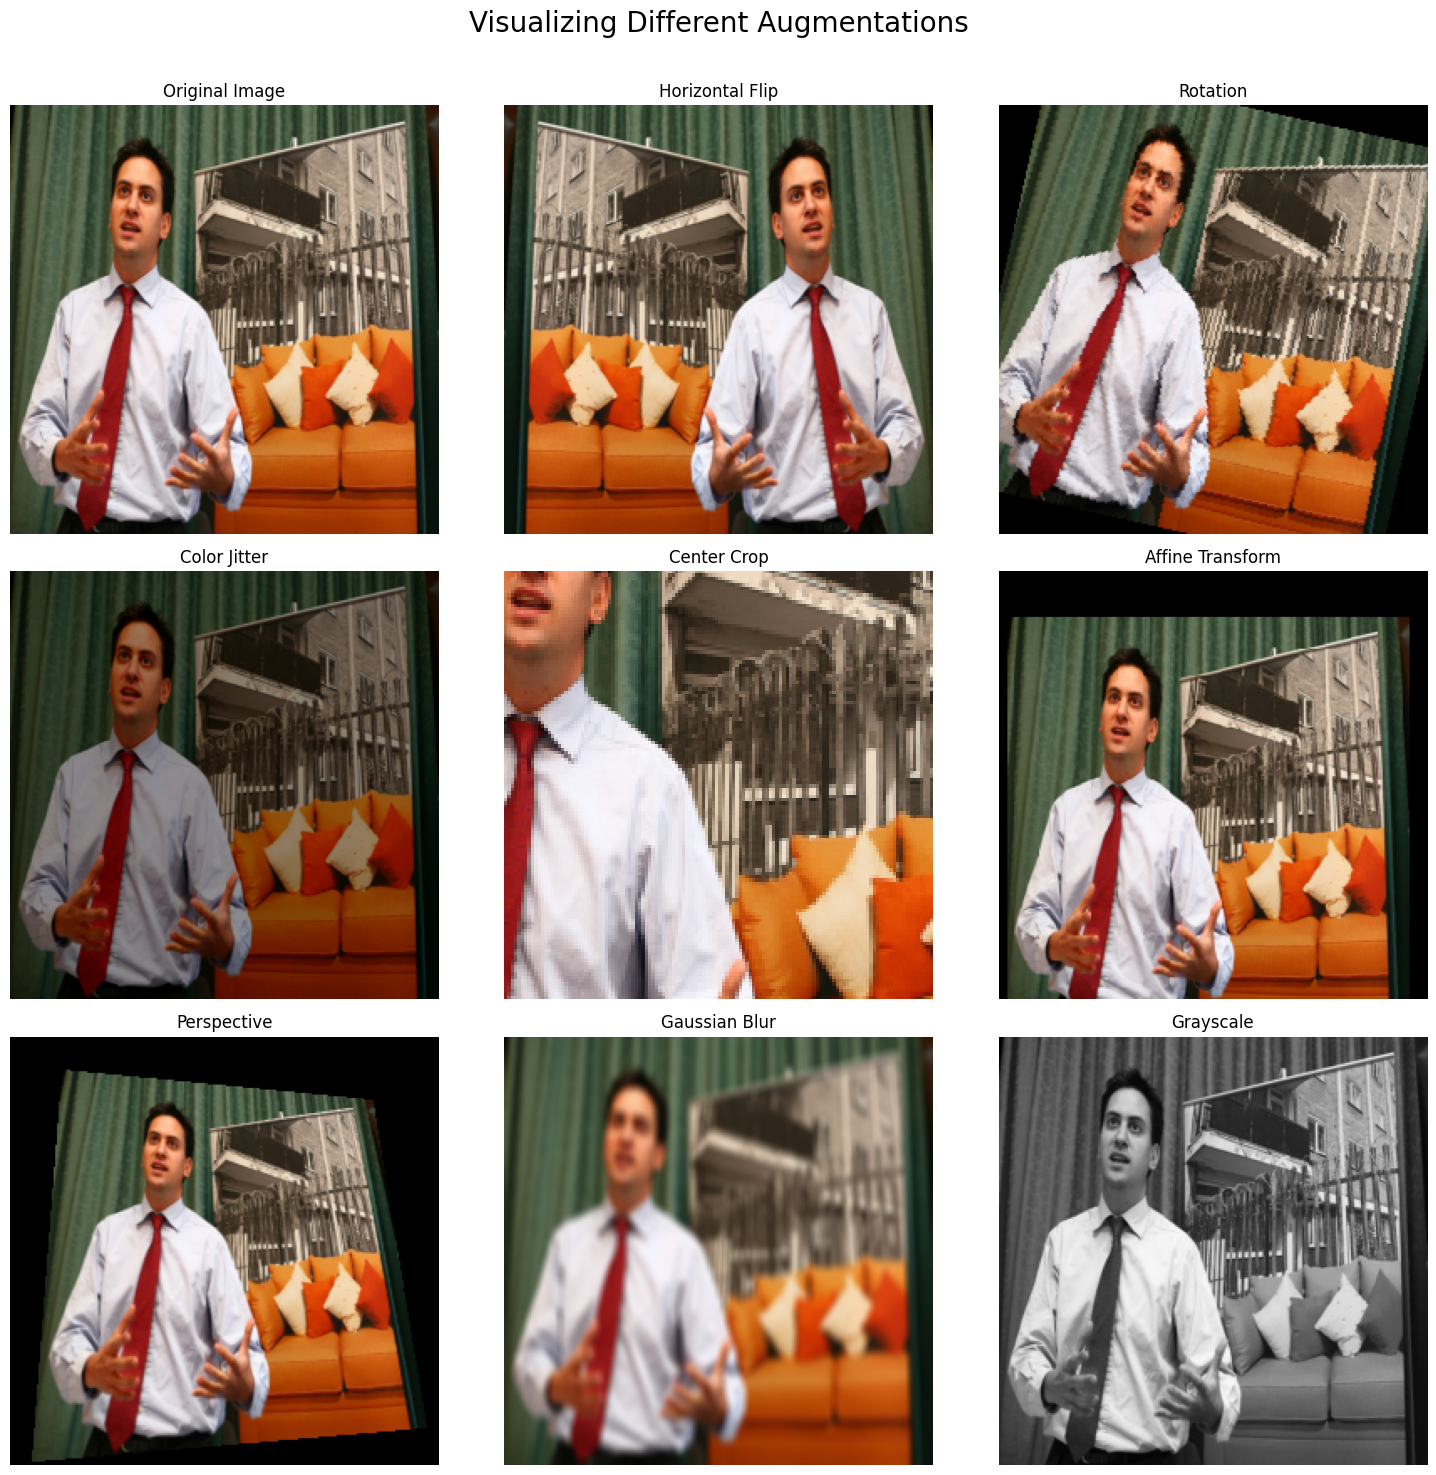

In [4]:
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# Define path to the image directory
IMAGE_DIR = '../data/val2017'

# Load a random image
random_image_name = random.choice(os.listdir(IMAGE_DIR))
img_path = os.path.join(IMAGE_DIR, random_image_name)
original_image = Image.open(img_path).convert("RGB")

# Define the target size for all images
TARGET_SIZE = (256, 256)

# Define a list of augmentation transformations to apply
augmentations = {
    "Horizontal Flip": T.RandomHorizontalFlip(p=1.0),
    "Rotation": T.RandomRotation(30),
    "Color Jitter": T.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    "Center Crop": T.CenterCrop(size=(TARGET_SIZE[0] // 2, TARGET_SIZE[1] // 2)), # Crop to half size
    "Affine Transform": T.RandomAffine(degrees=0, translate=(0.2, 0.2), scale=(0.8, 1.2)),
    "Perspective": T.RandomPerspective(distortion_scale=0.4, p=1.0),
    "Gaussian Blur": T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    "Grayscale": T.Grayscale(num_output_channels=3),
}

# Create a subplot grid to display the images
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Visualizing Different Augmentations', fontsize=20)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Display the original image (resized)
resized_original = F.resize(original_image, TARGET_SIZE)
axes[0].imshow(resized_original)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Apply and display each augmentation
i = 1
for name, transform in augmentations.items():
    # Create a pipeline that first resizes, then applies the transform
    pipeline = T.Compose([
        T.Resize(TARGET_SIZE),
        transform
    ])
    augmented_image = pipeline(original_image)

    # Convert back to PIL Image for displaying if it's a tensor
    if isinstance(augmented_image, torch.Tensor):
        augmented_image = F.to_pil_image(augmented_image)

    axes[i].imshow(augmented_image)
    axes[i].set_title(name)
    axes[i].axis('off')
    i += 1

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to make room for the suptitle
plt.show()

Original Images vs. Binary Masks of Main Subject

loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


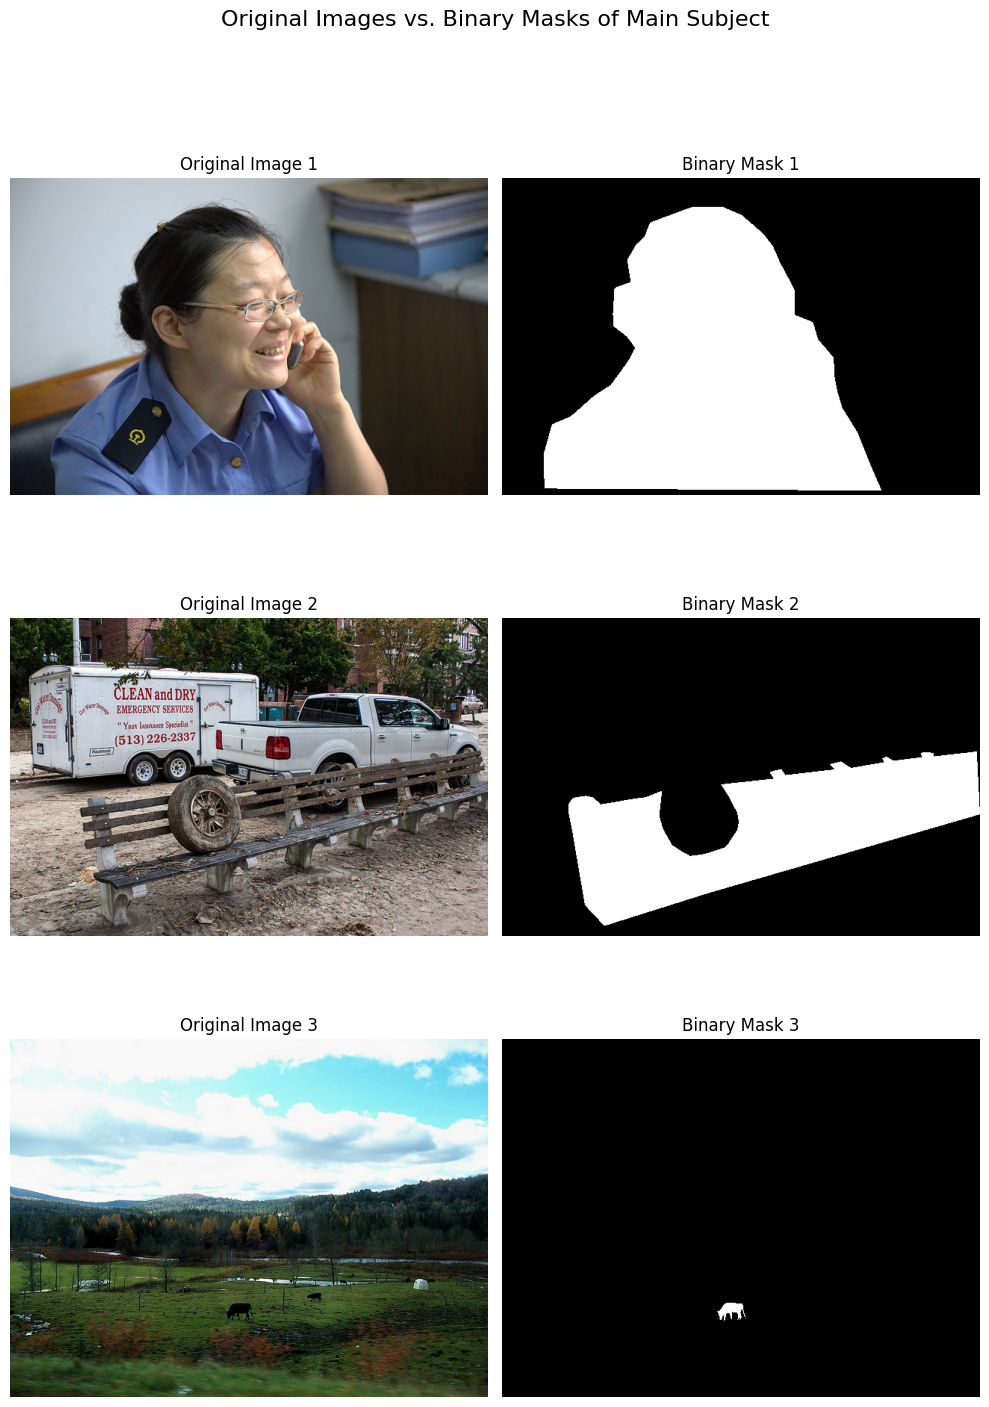

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pycocotools.coco import COCO
import os
import random

# Define path to the dataset
DATA_DIR = '../data'
IMAGE_DIR = os.path.join(DATA_DIR, 'val2017')
ANN_FILE = os.path.join(DATA_DIR, 'annotations', 'instances_val2017.json')
NUM_EXAMPLES = 3

# Initialize COCO API
coco = COCO(ANN_FILE)
img_ids = coco.getImgIds()

# Create a subplot grid for visualization
fig, axes = plt.subplots(NUM_EXAMPLES, 2, figsize=(10, 5 * NUM_EXAMPLES))
fig.suptitle('Original Images vs. Binary Masks of Main Subject', fontsize=16)

# Process and plot each image
for i in range(NUM_EXAMPLES):
    # Select a random image
    random_img_id = random.choice(img_ids)
    img_info = coco.loadImgs(random_img_id)[0]
    img_path = os.path.join(IMAGE_DIR, img_info['file_name'])
    original_image = Image.open(img_path).convert('RGB')

    # Get all annotations for the image
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    annotations = coco.loadAnns(ann_ids)

    # Plot original image
    axes[i, 0].imshow(original_image)
    axes[i, 0].set_title(f"Original Image {i+1}")
    axes[i, 0].axis('off')

    # Create an empty mask
    binary_mask = np.zeros((img_info['height'], img_info['width']))

    # Find the largest object (main subject) and create its mask
    if annotations:
        # Find annotation with the maximum area
        main_subject_ann = max(annotations, key=lambda x: x['area'])
        # Generate the binary mask for only that object
        binary_mask = coco.annToMask(main_subject_ann)

    # Plot the binary mask
    axes[i, 1].imshow(binary_mask, cmap='gray')
    axes[i, 1].set_title(f"Binary Mask {i+1}")
    axes[i, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()